# Decision Trees

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### Data loading

We are going to use the churn data-set and do a binary classification task on it.

In [ ]:
from google.colab import files
files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


{'WA_Fn-UseC_-Telco-Customer-Churn.csv': b'customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No\r\n5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.

In [ ]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We need to find the data points that doesn't have `TotalCharges` value and remove them.

In [ ]:
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

In [ ]:
# prompt: i want df["TotalCharges"] in O to float
df = df[pd.notnull(df['TotalCharges'])]
df['TotalCharges'] = df['TotalCharges'].astype(float)


<ipython-input-20-b16fae243008>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalCharges'] = df['TotalCharges'].astype(float)


We will use the following features:

In [ ]:
X = df[["tenure", "MonthlyCharges", "TotalCharges"]]
y = df["Churn"]

Encoding the categorical features with __Label Encoding__:

In [ ]:
# prompt: Encoding the categorical features with Label Encoding:

le = LabelEncoder()
y = le.fit_transform(y)
X['tenure'] = le.fit_transform(X['tenure'])

<ipython-input-29-c20af467645e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tenure'] = le.fit_transform(X['tenure'])


Split the data to train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.5)

Build Decision tree model

In [ ]:
# prompt: Build Decision tree model
# threshold = 0.5

# # Convert y_train to binary labels
# y_train_binary = (y_train > threshold).astype(int)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf = clf.fit(X_train, y_train)


Fit data

Test accuracy

Accuracy: 0.79


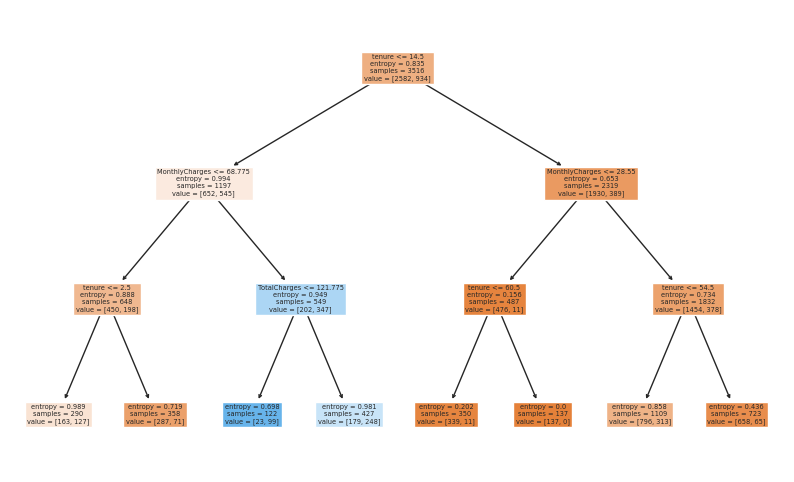

In [ ]:
# prompt: Test accuracy

from sklearn import metrics
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=X_train.columns)
plt.show()

depth of the decision tree

In [ ]:
# prompt: depth of the decision tree

clf.get_depth()


3

### Tuning the depth of the tree:

The `max_depth` identifies the maximum depth of the tree. By default, it is set to None which means that the nodes are expanded until all leaves are pure or until all leaves contain less than `min_samples_split` samples (which is by default set to 2). Therefore with these default paramters our decision tree will have a very large depth and it will __over-fit__ on the training data.

#### Exercise:
Tune the `max_depth` parameter and find the best value for it. What is the precision and recall for the best decision-tree classifier?

In [ ]:
# prompt: Tune the max_depth parameter and find the best value for it. What is the precision and recall for the best decision-tree classifier?

# Initialize variables
best_max_depth = None
best_precision = 0
best_recall = 0

# Loop through different max_depth values
for max_depth in range(1, 10):
  # Create a new decision tree classifier
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)

  # Fit the model
  clf.fit(X_train, y_train)

  # Predict on the test set
  y_pred = clf.predict(X_test)

  # Calculate the precision and recall
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)

  # Check if the current max_depth is the best
  if precision > best_precision and recall > best_recall:
    best_max_depth = max_depth
    best_precision = precision
    best_recall = recall

# Print the best max_depth, precision, and recall
print(f"Best max_depth: {best_max_depth}")
print(f"Best precision: {best_precision:.2f}")
print(f"Best recall: {best_recall:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best max_depth: 2
Best precision: 0.69
Best recall: 0.41


Plot the score v.s depth of tree

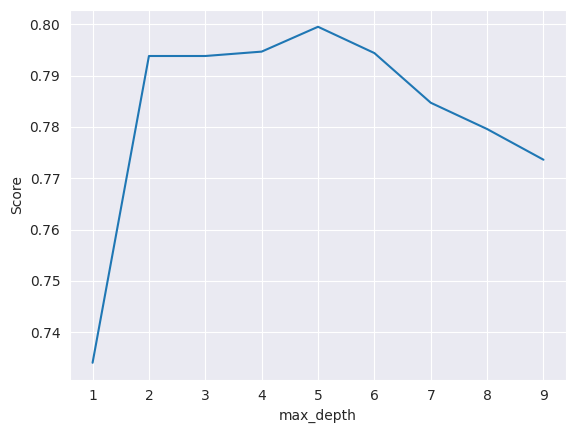

In [ ]:
# prompt: Plot the score v.s depth of tree

# Calculate the score for each max_depth
scores = []
for max_depth in range(1, 10):
  clf = DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  score = metrics.accuracy_score(y_test, y_pred)
  scores.append(score)

# Plot the score vs. max_depth
plt.plot(range(1, 10), scores)
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.show()


best depth

In [ ]:
import numpy as np
scores_array = np.array(scores)
scores_array.max()


0.7994880546075085

### Feature importance
The importance of a feature is computed as the (normalized) total reduction of the criterion (which is entropy in this case) brought by that feature.

In [ ]:
# prompt: The importance of a feature is computed as the (normalized) total reduction of the criterion (which is entropy in this case) brought by that feature.

feature_importances = clf.feature_importances_
for feature, importance in zip(X.columns, feature_importances):
  print(f"{feature}: {importance:.2f}")


tenure: 0.33
MonthlyCharges: 0.42
TotalCharges: 0.25


What is the most important feature in this classification task? Does it make sense?

### Visualizing the decision tree

Let's visualize the decision tree with the optimum `max_depth` parameter.

In [ ]:
!pip install pydotplus
!pip install graphviz


In [ ]:
!pip install six

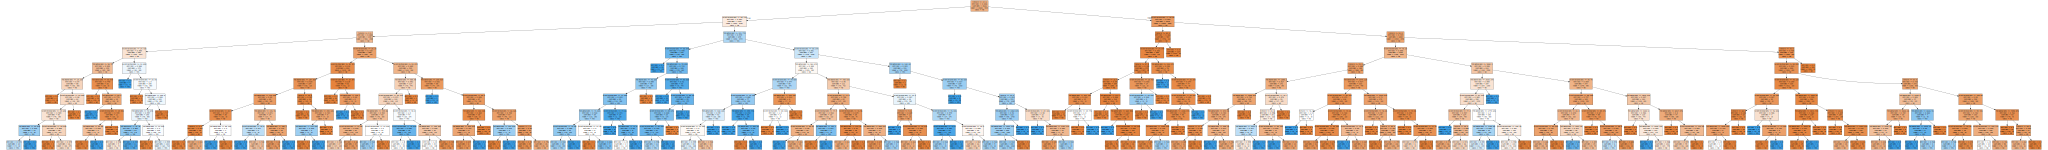

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

graph = Source(export_graphviz(clf, out_file=None
   , feature_names=X_train.columns, class_names=['No', 'Yes']
   , filled = True))
display(SVG(graph.pipe(format='svg')))

## Exercise: decision tree regressor

In this exercise we will use decision trees for a regression problem. We will use the Boston Housing dataset. This data-set contains information about houses in the suburbs of Boston. There are 506 samples and 14 attributes. For simplicity and visualization purposes, we will only use two — MEDV (median value of owner-occupied homes in $1000s) as the target and LSTAT (percentage of lower status of the population) as the feature.

### train-test split

In [ ]:
# TO DO

### Decision tree regressor
Now it is time to find a model which fits this data. Note that as we have a regression problem here, we need a criterion which is suitable for a continuous output. Tune the maximum depth of the tree and find the best value. What is the test error for this regressor?

In [ ]:
!pip install scikit-learn==1.1.3
from sklearn.datasets import load_boston

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
boston=load_boston()
boston_df=pd.DataFrame(boston.data, columns=boston.feature_names)
# Split the data into training and testing sets


boston_df['MEDV'] = boston.target  # Add the target variable (median value of owner-occupied homes)

# Select the feature (LSTAT) and target (MEDV)
X = boston_df[['LSTAT']]
y = boston_df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(max_depth=3)
# Fit the model to the training data
tree_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)



Mean Squared Error: 24.57


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 24.57


Best max_depth: 4
Best mean squared error: 24.15


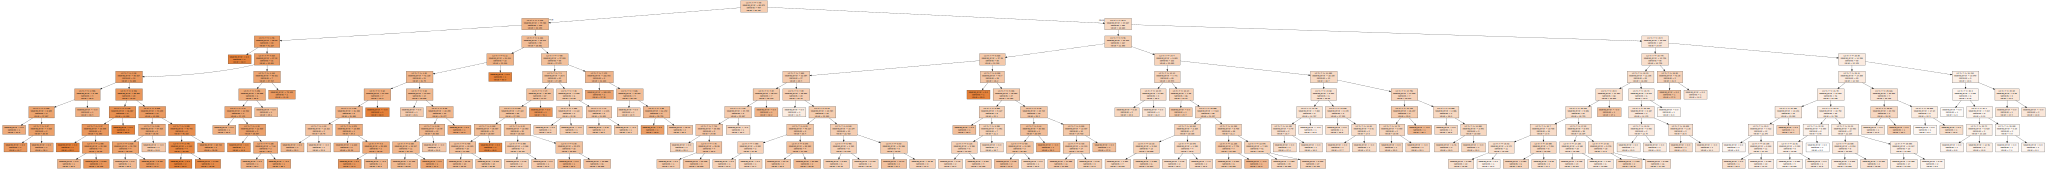

In [ ]:
# prompt: tune the max_depth parameter
!pip install graphviz
from sklearn.tree import export_graphviz
from IPython.display import SVG

import graphviz
from graphviz import Source
import numpy as np
# Initialize variables
best_max_depth = None
best_mse = np.inf

# Loop through different max_depth values
for max_depth in range(1, 10):
  # Create a new decision tree regressor
  tree_regressor = DecisionTreeRegressor(max_depth=max_depth)

  # Fit the model
  tree_regressor.fit(X_train, y_train)

  # Predict on the test set
  y_pred = tree_regressor.predict(X_test)

  # Calculate the mean squared error
  mse = mean_squared_error(y_test, y_pred)

  # Check if the current max_depth is the best
  if mse < best_mse:
    best_max_depth = max_depth
    best_mse = mse

# Print the best max_depth and mean squared error
print(f"Best max_depth: {best_max_depth}")
print(f"Best mean squared error: {best_mse:.2f}")

# Visualize the decision tree
graph = Source(export_graphviz(tree_regressor, out_file=None
   , feature_names=X_train.columns, class_names=['No', 'Yes']
   , filled = True))
display(SVG(graph.pipe(format='svg')))


[link text](https://)
Plot the data points together with the regression tree line fit to see how good the model fits the data.

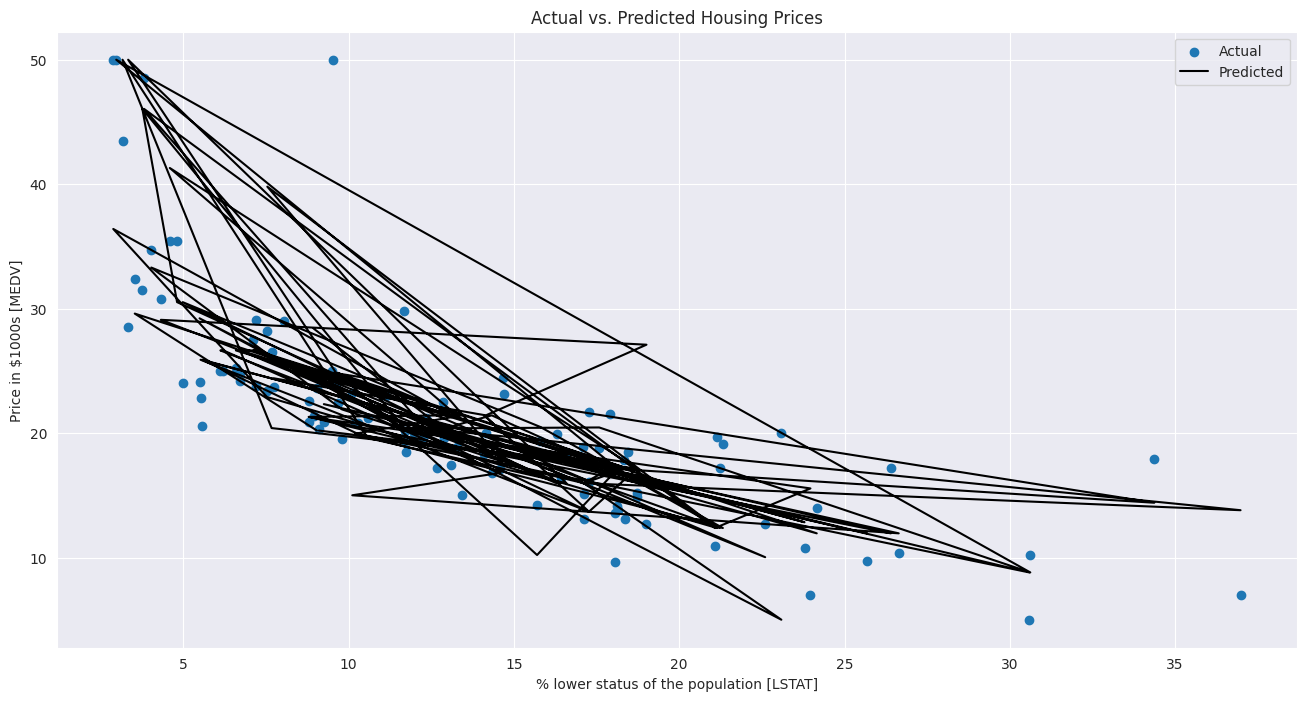

In [ ]:
# TO DO
plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, c='steelblue', edgecolor='white', s=70, label='Actual')
plt.plot(X_test, y_pred, color='black', lw=2, label='Predicted')
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.title('Actual vs. Predicted Housing Prices')
plt.legend()
plt.show()